<a href="https://colab.research.google.com/github/GGiffo/4/blob/main/github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler1 = StandardScaler()
X1_normalized = scaler1.fit_transform(X1)

scaler2 = StandardScaler()
X2_normalized = scaler2.fit_transform(X2)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

# Параметры для Grid Search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Параметр регуляризации
    'max_iter': [100, 200, 500],          # Количество эпох
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.2]              # Начальный learning rate
}

# Grid Search для Dataset 1
grid_search1 = GridSearchCV(SGDRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search1.fit(X1_normalized, y1)

# Grid Search для Dataset 2
grid_search2 = GridSearchCV(SGDRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X2_normalized, y2)

# Лучшие параметры
print(f'Лучшие параметры для Dataset 1: {grid_search1.best_params_}')
print(f'Лучшие параметры для Dataset 2: {grid_search2.best_params_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Лучшие параметры для Dataset 1: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'invscaling', 'max_iter': 100}
Лучшие параметры для Dataset 2: {'alpha': 0.0001, 'eta0': 0.2, 'learning_rate': 'constant', 'max_iter': 500}


In [20]:
# Лучшие модели
best_model1 = grid_search1.best_estimator_
best_model2 = grid_search2.best_estimator_

# Предсказания
y1_pred = best_model1.predict(X1_normalized)
y2_pred = best_model2.predict(X2_normalized)

MSE для Dataset 1: 0.82
MSE для Dataset 2: 3.85


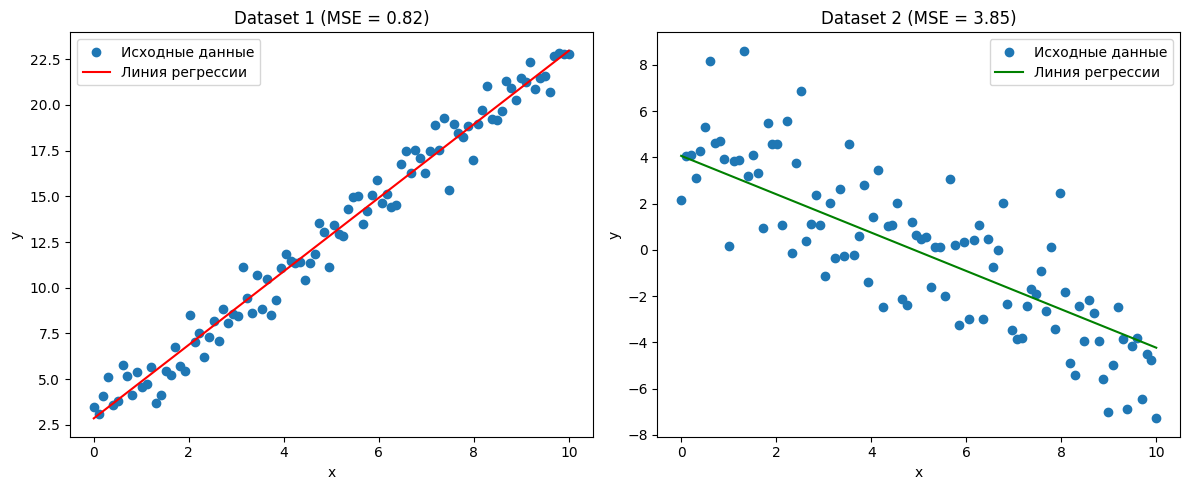

In [21]:
from sklearn.metrics import mean_squared_error

# Оценка качества
mse1 = mean_squared_error(y1, y1_pred)
mse2 = mean_squared_error(y2, y2_pred)
print(f'MSE для Dataset 1: {mse1:.2f}')
print(f'MSE для Dataset 2: {mse2:.2f}')

# Графическая интерпретация
plt.figure(figsize=(12, 5))

# График для Dataset 1
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Исходные данные')
plt.plot(x1, y1_pred, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Dataset 1 (MSE = {mse1:.2f})')

# График для Dataset 2
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Исходные данные')
plt.plot(x2, y2_pred, color='green', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Dataset 2 (MSE = {mse2:.2f})')

plt.tight_layout()
plt.show()